# 1. What Is Template Matching?

Template matching is the concept in digital image processing used to extract a location of a pattern which is present in the image which is close to a convolution.<br>

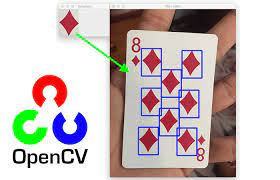

# 2. Advantage:

    - It is very useful to extract small features in an image.

# 3. Disadvantage:

    - More the number of template matching performed slower will be the process

    - since convolution is a slow process performing on a large pixeled image can reduce the performance of the code

    - slows down your computer on consecutive running and hence not consistent

    - It depends on your processor speed greater it is the better


### 4. Template matching is not the best when comes to game automation doesnt mean it lies in the bottom end. It can be used to automate games with less patterns 


# Karate Chop Kick 🎮🎮
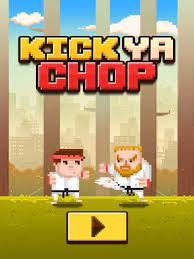

### 5. Before trying `Kick Chop` game we tried all these games and they were not compatible with Template matching (or We werent good enough 🙂)

- [Karate chop kick](https://html5.gamedistribution.com/dcd1e2c947894c5d8e94f43c87258dc8/)

- [Tower Boxer](https://www.addictinggames.com/action/tower-boxer)
 
- [Parkour climb](https://www.addictinggames.com/action/parkour-climb)
 
- [Cookie clicker](https://orteil.dashnet.org/cookieclicker/)


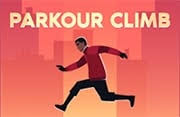

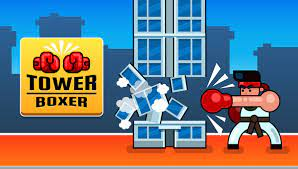

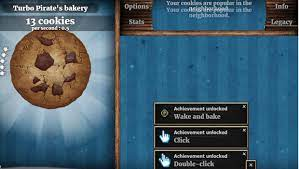


We created a Bot which at its best scored upto `2620` in the game of Karate chop kick.



# 1. Installing Libraries

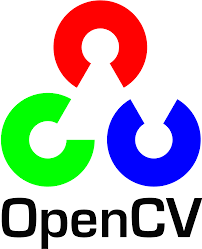

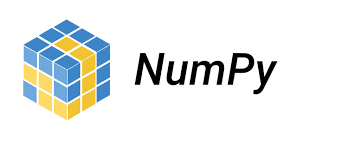

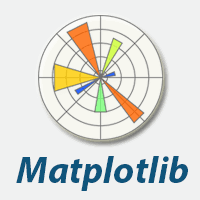

In [1]:
!pip install opencv-python
!pip install numpy
!pip install keyboard
!pip install pyautogui
!pip install pynput
!pip install matplotlib
!pip install pyscreenshot

# 2. Importing Libraries

In [2]:
import keyboard # For keyboard input

import cv2 # For image processing

import numpy as np # For numpy mathematiacl array operations

from time import sleep # For time delay

import pyautogui #For Mouse contol

import pyscreenshot# For screenshots

from pynput.mouse import Button,Controller # For mouse control

import matplotlib.pyplot as plt # For plotting

# 2. Usage and Tips:


- This code is built to work on a `1920 x 1080` screen .

- Make sure to fullscreen the game before running.

- Keyboard is used to recieve the input `s` and `q` 

- `s` is used to start the game & `q` is used to quit the game.

- `pyautogui.pause` is to prevent break interval for pyautogui library

<img src="https://qph.fs.quoracdn.net/main-qimg-0b14409ce22da46eabeb3c68e0f7c6ba">

# 3. Game ? - Karate Chop Kick 🎮🎮
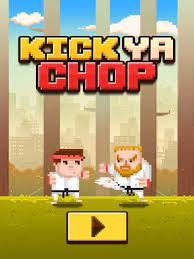

# 4. GAME DESCRIPTION + INSTRUCTIONS
- Kick Ya Chop is a funny clicker game with ninjas!
- There is a ninja in the woods named Ryu and there is nothing more he likes doing than chopping trees!

- Click right and left while avoiding branches to get the best possible score on this online game.
-  The faster you go the more time you will have.
-   Monitor the bar at the top to make sure you are not running out of time. 
-   Go as fast as you can without making any errors. 
-   If you hit a branch, you lose. This is the kind of game you can play again and again though. 
-   Fight against yourself and try to beat your best score every time you play this online game.


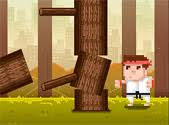

# 5. Code

In [3]:
pyautogui.PAUSE=0 #pyautogui.PAUSE is to prevent break interval for pyautogui library

print('Press s to start playing:')
print('Press q to quit playing:')
# keyboard.wait('s')

Press s to start playing:
Press q to quit playing:


# 6. Getting screen coordinates

- Using Ms paint we figured out the left log and right log.
- It is better to use a `gray scale images` to get a higher probability of template matching.

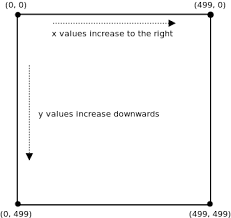

In [4]:
leftside=(810,500,200,200) # Left log coordinates - (x,y,width,height)

rightside=(1000,500,200,200) # Right log coordinates - (x,y,width,height)

#left wood block image
leftwood=cv2.imread('left.png',0)

#right wood block image
rightwood=cv2.imread('right.png',0)

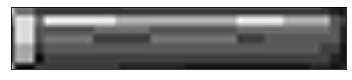

In [5]:
plt.imshow(leftwood,cmap='gray') #plot left wood block image
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

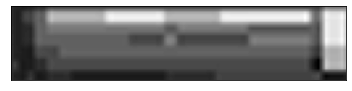

In [6]:
plt.imshow(rightwood,cmap='gray') #plot right wood block image
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# 7. Analysing Mouse Clicking Library

## 7.1. pyautogui / pynput / mss

1.  `pyautogui` was the slowest among all gives a result very close to `2100` at max

2.  **pynput**: is another mouse controller module which is slightly slower than `mouse` module but is efficient when comes to working with our platform

3.  `mouse` module is faster by 0.03ms but it didnt support the platform which was being used

#  So `pynput` wins 🏆🏆

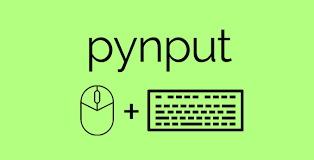

In [7]:
mouse = Controller() # Mouse controller object (pynput.mouse module)

flag=1

- `flag` = 1 -> left log just above his head
- `flag` = 0 -> right log just above his head


# 8. Screenshoting Libraries: 💻

##  4 options were available

- `pywin32` - Really fast , but not for Linux

- `mss` - Fast , but not for Linux

- `imagegrab` not in linux but good in mac and windows
 - (Alternatives)[https://stackoverflow.com/questions/43520757/imagegrab-alternative-in-linux]

- `pyscreenshot` screenshot : not the best but faster than pyautogui

- `pyautogui` screenshot : very slow compared to the above

# so we used `pyautogui`

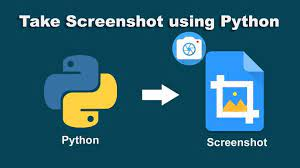

This is the class which describes the protaganist the template matching is done

In [8]:
def matchobstacle(flag):
    
    ''' This function is to match the obstacle with the log '''
    
    if flag: # If flag is 1, then left log is selected
      
      scr=ImageGrab.grab(bbox =leftside)
      
      wood=leftwood
    
    else : # If flag is 0, then right log is selected
    
      scr=ImageGrab.grab(bbox =rightside)
    
      wood=rightwood

    scr=np.array(scr) # Convert the screenshot to numpy array for image processing
    
    scr=cv2.cvtColor(scr,cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
    
    # Gray scale image of the wood block gives better results
    
    
    # ! Algo used - TM_CCOEFF_NORMED
    result=cv2.matchTemplate(scr,wood,cv2.TM_CCOEFF_NORMED) 
    
    _,maxval,_,maxloc=cv2.minMaxLoc(result) # Find the maximum value and its location

    Threshold=0.6 # Threshold value for the maximum value
    
    if maxval>Threshold: # Object Matching
        flag=not flag 
        
    return flag,maxloc
    

# 9. Template Matching Algorithms

Among the 6 algo we tested all and the best one was `cv2.TM_CCOEFF_NORMED`

1. `cv2.TM_CCOEFF`
2. `cv2.TM_CCOEFF_NORMED` ✅
3. `cv2.TM_CCORR`
4. `cv2.TM_CCORR_NORMED`
5. `cv2.TM_SQDIFF`
6. `cv2.TM_SQDIFF_NORMED`

###  So We used `cv2.TM_CCOEFF_NORMED`

In [9]:
while 1:
      
  flag,maxloc=matchobstacle(flag) # Get flag and maxloc values
  
  if(flag): # If flag is 1, then left log is selected
    
    mouse.position=(885,700) 
  
  else:
  
    mouse.position=(1165,700)
  
  val =0.043 
  
  sleep(val)
  
  if keyboard.is_pressed('q'):
      break

# 10. Note:

## 10.1. `time.sleep(val)`

    If val increases -> the game will be Slower -> Lesser Hiscore
    If val decreases -> the game will be faster -> PC stops working

After trying a lot of different values of 
     `time.sleep(val)` we found that 0.043 was the best value.

###  ! This value may differ from one computer to another. 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmFE7w5XMf1phYv7Uhw6gStwTI5owVCmWrLA&usqp=CAU">

# 11. Conclusion

We got a high score of `2620` but in out run we got the score as `2561` (The game is very random)

Check out our high score!

In [10]:
# Image of hiscore
img = cv2.imread('hiscore.png')

# BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


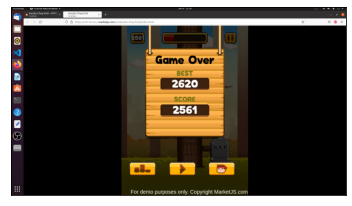

<Figure size 2160x2160 with 0 Axes>

In [11]:
# Show image
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.figure(figsize=(30,30))
plt.show();

## So that's it from our side , Thanks for reading this. 😄